Zomato Restaurant

Project Description

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.


Data Storage:

This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:

• Country code
• Country name

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant&#39;s location

• Latitude: Latitude coordinate of the restaurant&#39;s location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies ��

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no

• Price range: range of price of food


• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings casted by people


Problem statement : In this dataset predict 2 things –

1) Average Cost for two
2) Price range



Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets



Dataset Link-  
•	https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx

•	https://github.com/dsrscientist/dataset4/blob/main/zomato.csv



# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')


# Importing dataset

In [2]:
df1=pd.read_csv("country_code.csv")
df1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [3]:
df2=pd.read_csv("zomato.csv")

df2 


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,__stanbul,"Kemanke__ Karamustafa Pa__a Mahallesi, R۱ht۱m ...",Karak__y,"Karak__y, __stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A__ac۱,208,__stanbul,"Ko__uyolu Mahallesi, Muhittin __st__nda__ Cadd...",Ko__uyolu,"Ko__uyolu, __stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,__stanbul,"Kuru__e__me Mahallesi, Muallim Naci Caddesi, N...",Kuru__e__me,"Kuru__e__me, __stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A___k Kahve,208,__stanbul,"Kuru__e__me Mahallesi, Muallim Naci Caddesi, N...",Kuru__e__me,"Kuru__e__me, __stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [4]:
# Merge datasets
df = df1.merge(df2, on='Country Code', how='inner')

In [5]:
df

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,216,United States,17697389,The Screaming Eagle,Waterloo,"228 E 4th St., Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335523,42.498400,...,Dollar($),No,No,No,No,1,3.7,Yellow,Good,101
9547,216,United States,17697424,The Thai Bowl,Waterloo,"624 Sycamore Street, Waterloo, IA 50703",Waterloo,"Waterloo, Waterloo",-92.335769,42.497919,...,Dollar($),No,No,No,No,1,3.5,Yellow,Good,58
9548,216,United States,17697332,Tokyo Japanese Steak House,Waterloo,"1931 Sears Street, Waterloo, IA 50702",Waterloo,"Waterloo, Waterloo",-92.323400,42.465580,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156
9549,216,United States,17694056,Theo Yianni's Authentic Greek Restaurant,Weirton,"322 American Way, Weirton, WV 26062",Weirton,"Weirton, Weirton",-80.529488,40.396043,...,Dollar($),No,No,No,No,2,3.9,Yellow,Good,156


This is a regression and classification both type machine learning problem because the goal is to predict a continuous and discrete numeric output variable in this data set numerical data and categorical data is present

In [6]:
df.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [7]:
df.sample(10)

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
3517,1,India,18282015,Bikaner Sweets,New Delhi,"45/1, Ashok Nagar, Jail Road, New Delhi",Jail Road,"Jail Road, New Delhi",77.099754,28.634452,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
4038,1,India,307802,Town Hall,New Delhi,"60-61, Near Dayal Opticals, Middle Circle Lane...",Khan Market,"Khan Market, New Delhi",77.227052,28.600035,...,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,1186
2753,1,India,9817,Pummy Restaurant,New Delhi,"L-3, Near MTNL Office, Dilshad Garden, New Delhi",Dilshad Garden,"Dilshad Garden, New Delhi",77.321248,28.681529,...,Indian Rupees(Rs.),No,No,No,No,2,2.7,Orange,Average,14
815,1,India,18341926,Cafe Amaretto,Gurgaon,"Ground Floor, DLF South Point Mall, Golf Cours...","DLF South Point Mall, Golf Course Road","DLF South Point Mall, Golf Course Road, Gurgaon",77.099118,28.448156,...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.1,Green,Very Good,147
1531,1,India,312570,Shri Shyam Ji Ke Mashhoor Chhole Bhature,Gurgaon,"C Block, Near Fauji Market, Sushant Lok, Gurgaon","Sushant Shopping Arcade, Sushant Lok, Gurgaon","Sushant Shopping Arcade, Sushant Lok, Gurgaon,...",77.081131,28.453273,...,Indian Rupees(Rs.),No,No,No,No,1,3.3,Orange,Average,26
6058,1,India,18472653,Marine Drivve - Club & Courtyard,New Delhi,"A-2, Vishal Enclave, Opposite Metro Pillar 412...",Rajouri Garden,"Rajouri Garden, New Delhi",0.000000,0.000000,...,Indian Rupees(Rs.),Yes,No,No,No,4,3.8,Yellow,Good,52
5906,1,India,4490,Cup Cakes - Radisson Blu,New Delhi,"Radisson Blu, District Centre, Outer Ring Road...","Radisson Blu, Paschim Vihar","Radisson Blu, Paschim Vihar, New Delhi",77.090586,28.667263,...,Indian Rupees(Rs.),No,No,No,No,4,3.1,Orange,Average,40
1122,1,India,18471259,Pind Bawarchi,Gurgaon,"Shop 4 & 5, Huda Market, Sector 14, Gurgaon",Sector 14,"Sector 14, Gurgaon",77.048274,28.472892,...,Indian Rupees(Rs.),No,Yes,No,No,2,3.1,Orange,Average,8
7907,1,India,395,Pizza Hut Delivery,Noida,"5-10 & 12, Parsvanath Plaza, G Block, Sector 2...",Sector 27,"Sector 27, Noida",77.328325,28.577548,...,Indian Rupees(Rs.),No,Yes,No,No,2,2.3,Red,Poor,62
1199,1,India,18412887,Faasos,Gurgaon,"SCO 48, Sector 23-A, Sector 23, Gurgaon",Sector 23,"Sector 23, Gurgaon",77.053841,28.504107,...,Indian Rupees(Rs.),No,Yes,No,No,2,3.0,Orange,Average,13


# Cleaning the data

In [8]:
#checking the null value of  column of dataset
df.isnull().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

we observe that there is no null value is present in any columns

In [9]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 9


we observe that there is 9 missing values in this dataset

<Axes: >

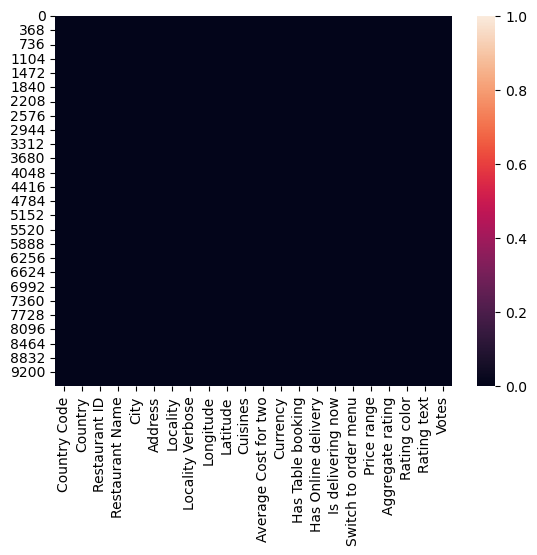

In [10]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe by heat map that there is no null value  present in any columns but 9 missing values are there

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

 we observe that there is no null value present in any column but in Cuisines column there is 9 missing values are present,and all datatypes seem to object,int and float

In [12]:
# Fill missing values in the 'Categorical' column with 'Unknown'
df['Cuisines'].fillna('Unknown', inplace=True)

In [13]:
print("Number of null or missing values in dataset",df.isnull().sum().sum())

Number of null or missing values in dataset 0


we observe that there is no missing values in any column

# Exploratory Data Analysis(EDA)

In [14]:
#checking the shape of dataset
df.shape

(9551, 22)

we observe that there 9551row and 22 columns is present in this dataset

In [15]:
#checking the column of dataset
df.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

there are 22 no of column is present out of which Average Cost for two is our target for first problem and Price range for second problem

In [16]:
# to convert index from row to column
df.columns.tolist()


['Country Code',
 'Country',
 'Restaurant ID',
 'Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Longitude',
 'Latitude',
 'Cuisines',
 'Average Cost for two',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Price range',
 'Aggregate rating',
 'Rating color',
 'Rating text',
 'Votes']

In [17]:
#checking the types of column of dataset
df.dtypes

Country Code              int64
Country                  object
Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

We observe there are  object,int type and float datatype are present

In [18]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Country Code,15
Country,15
Restaurant ID,9551
Restaurant Name,7446
City,141
Address,8918
Locality,1208
Locality Verbose,1265
Longitude,8120
Latitude,8677


mostly all column have unique value in all column there  140 unique value present in target Average Cost for two and 4 unique value present in Price range	

In [19]:
#checking the null value of all column of dataset
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
94       21
166      20
184      20
191      20
37        4
Name: Country Code, dtype: int64


India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64


3400025     1
309811      1
18460981    1
18287389    1
1629        1
           ..
4096        1
18358700    1
2217        1
18398571    1
17559793    1
Name: Restaurant ID, Length: 9551, dtype: int64


Cafe Coffee Day                       83
Domino's Pizza                        79
Subway                                63
Green Chick Chop                      51
McDonald's                            48
 

These are the value counts of all columns and we have seen there is  no white space are present

In [20]:
#checking the list of counts of target
df["Average Cost for two"].unique()

array([   850,    700,    500,    400,   1000,   2000,   2500,    800,
         3600,      0,    550,   1100,   1500,    900,   1800,    300,
         1400,    350,    450,    600,    950,   1200,    200,    100,
          150,    650,   1300,   2400,    250,   1600,   2200,    750,
         1700,   1250,   1900,   2700,   3500,   5000,   2300,   1750,
         3200,   3000,   2100,   1850,   4500,   4000,   3300,    120,
         1350,   1650,   1950,   1050,    290,     50,   1450,   2800,
          260,   3650,   4800,   1550,    720,   6500,   7000,   1150,
         2900,   2600,   4700,   3700,   3800,   4100,   4300,   2650,
         6000,   5100,   5500,   4400,   4200,   8000,   2350,     20,
            7,     30,     55,     45,     60,     80,     90,    230,
          240,    140,    170,     40,     70,     85,     75,     65,
           25, 150000,  70000, 250000, 200000, 165000, 800000, 500000,
       300000, 450000, 120000, 100000, 350000,     35,    190,    105,
      

appox 140 unique value

In [21]:
df["Average Cost for two"].value_counts()

500       900
300       897
400       857
200       687
600       652
         ... 
70000       1
165000      1
450000      1
120000      1
4300        1
Name: Average Cost for two, Length: 140, dtype: int64

there are 140 unique value are present in Average Cost for two

In [22]:
df["Price range"].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

there are 4 unique value are present in Price range

In [23]:
df.describe()

,Country Code,Restaurant ID,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,9.051128e+06,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,8.791521e+06,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,5.300000e+01,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.019625e+05,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,6.004089e+06,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,1.835229e+07,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,1.850065e+07,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


This gives the all statical information of the numerical columns.There is no negative or invalid value is present
hence we can say that it is perfect we can observe these points: 

    1.The counts of all columns are same it means there is no missing value in any column
    
    2.The mean value and median(50%) in Country Code,Restaurant ID,Average Cost for two,Price range	Aggregate rating and	Votes all columns are apoximately high  it means that data set is skewed in  right direction and it is not normally distributed  columns which means the data is  skewed  in these columns 
    
    3.There is Longitude,Latitude and Aggregate rating  columns in which mean value is less than median(50%) hence there  left skewed 
    
    4.There is  major difference beteen 75% and max in Average Cost for two it means there is outliers are present in these columns
    
    5.In this discription min,std and 25% detail also found

In [24]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: ['Country', 'Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


Numerical columns: ['Country Code', 'Restaurant ID', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']


There are 8 Numerical column are present and 14 Categorical columns also present

# Preprocessing

In [25]:
#Convering categorical columns in numerical columns
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[categorical_col] = df[categorical_col].apply(lambda col: le.fit_transform(col))

In [26]:
#checking the categorical& numerical value of all column of dataset
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical columns:",categorical_col)
print("\n")

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:",numerical_col)

Categorical columns: []


Numerical columns: ['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


we observe that all column are converted in numerical column

<Axes: >

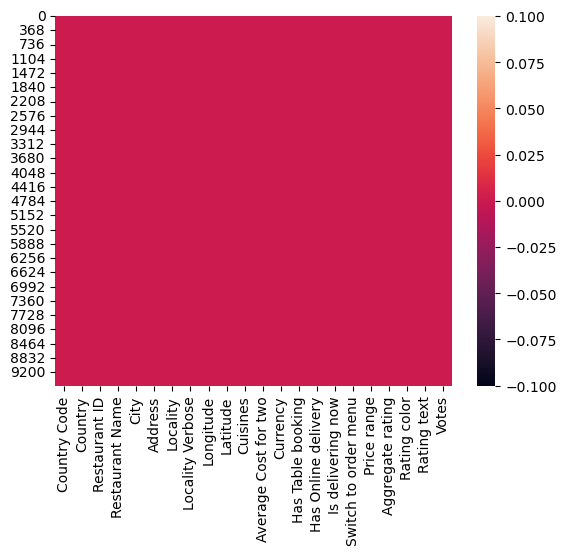

In [27]:
#checking the null value of  column of dataset by heat map
sns.heatmap(df.isnull())

we observe that all nan values are filled no nan is present

# Data visualization

500       900
300       897
400       857
200       687
600       652
         ... 
70000       1
165000      1
450000      1
120000      1
4300        1
Name: Average Cost for two, Length: 140, dtype: int64


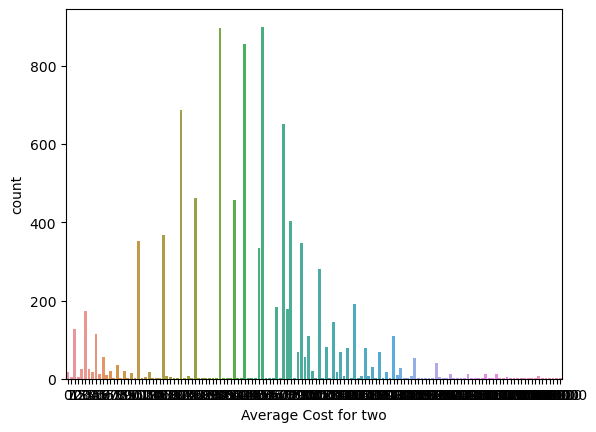

In [28]:
#visualizing the Average Cost for two
ax=sns.countplot(x='Average Cost for two',data=df)
print(df['Average Cost for two'].value_counts())

We observe that Average Cost for two is high as 900

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64


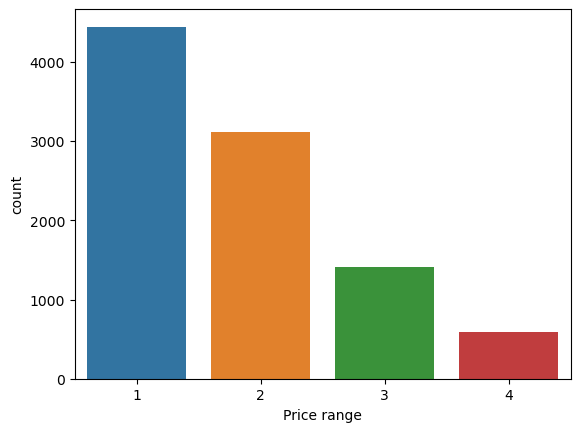

In [29]:
#visualizing the Price range
ax=sns.countplot(x='Price range',data=df)
print(df['Price range'].value_counts())

we observe that count for  price range for 1 is high aprox 4444

[Text(0.5, 1.0, 'Effect of Country Code on Average Cost for two')]

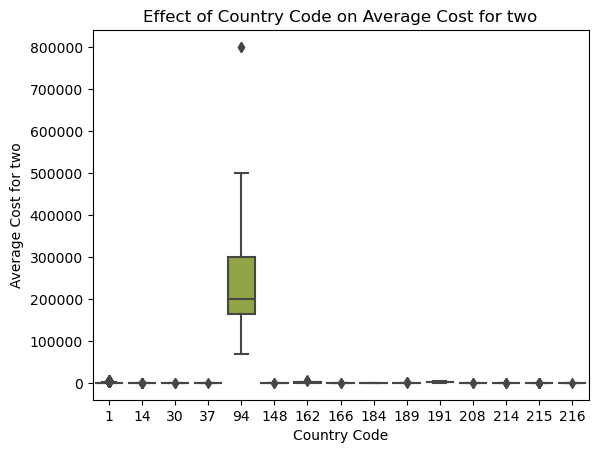

In [30]:
bp = sns.boxplot(x='Country Code',y='Average Cost for two', data=df)
bp.set(title="Effect of Country Code on Average Cost for two")

we observe that average cost for two is hight in Indonesia whose country code is 94

[Text(0.5, 1.0, 'Effect of Longitude on Average Cost for two')]

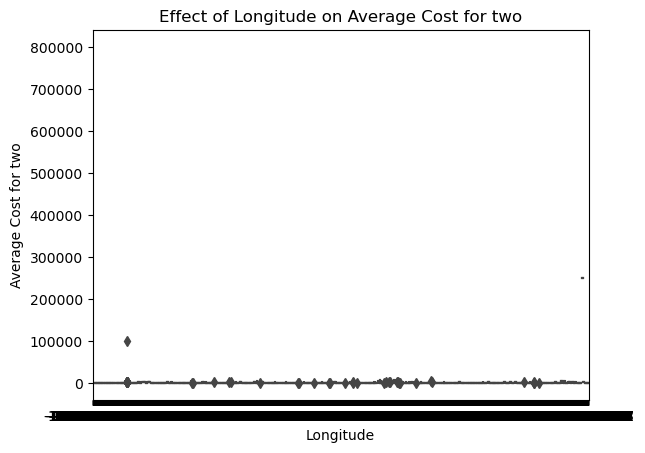

In [31]:
bp = sns.boxplot(x='Longitude',y='Average Cost for two', data=df)
bp.set(title="Effect of Longitude on Average Cost for two")

we obseve that at low longitute average price for two is high

[Text(0.5, 1.0, 'Effect of Latitude on Average Cost for two')]

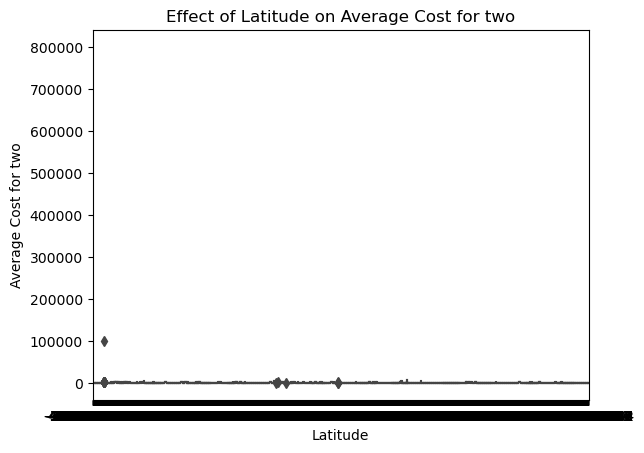

In [32]:
bp = sns.boxplot(x='Latitude',y='Average Cost for two', data=df)
bp.set(title="Effect of Latitude on Average Cost for two")

we obseve that at low latitute average price for two is high

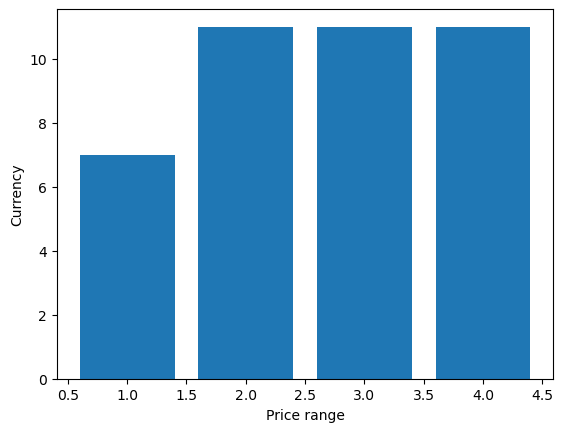

In [33]:
plt.bar(df['Price range'], df['Currency'])
plt.xlabel('Price range')
plt.ylabel('Currency')
plt.show()

we observe that at currency at 7 price range is low

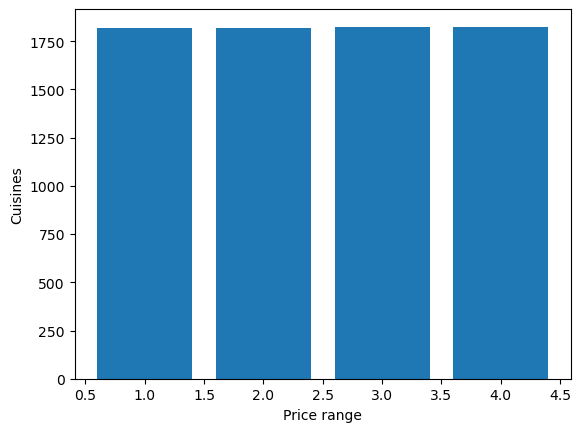

In [34]:
plt.bar(df['Price range'], df['Cuisines'])
plt.xlabel('Price range')
plt.ylabel('Cuisines')
plt.show()

We observe that there is no effect of cuisines

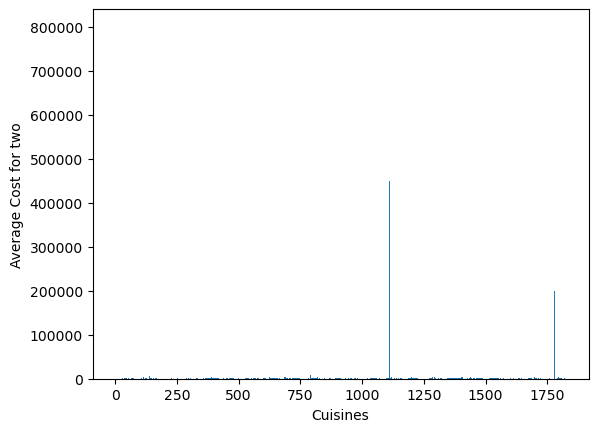

In [35]:
plt.bar(df['Cuisines'], df['Average Cost for two'])
plt.xlabel('Cuisines')
plt.ylabel('Average Cost for two')
plt.show()

we observe that as well as at 1100 cuisines average cost for two is high

<Axes: >

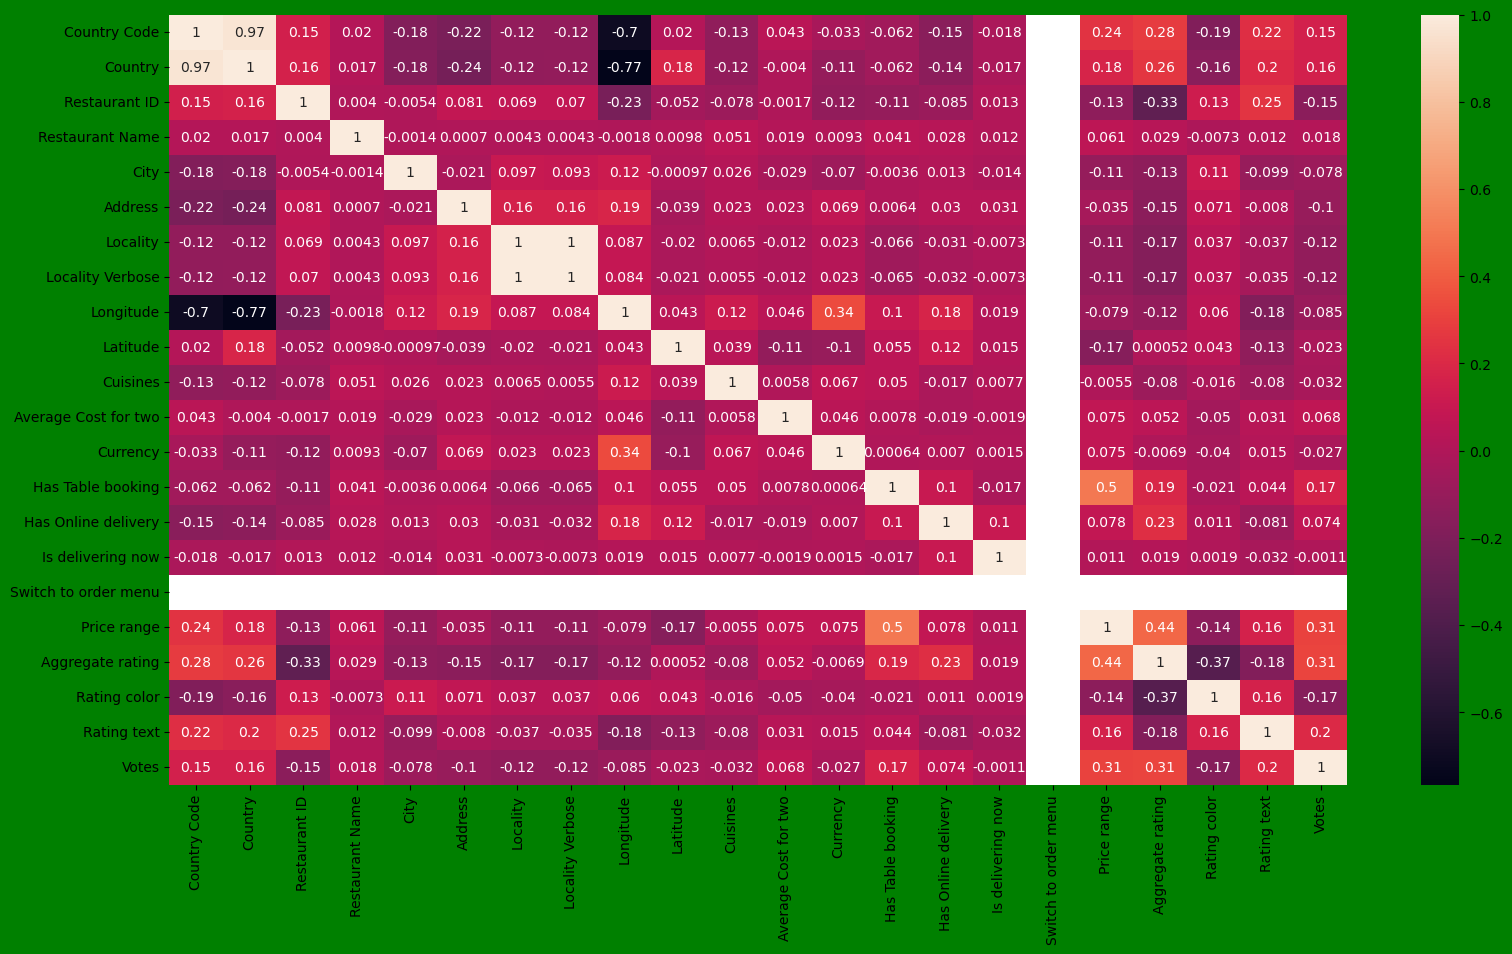

In [36]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

switch to order menu is highly correlated with all feature

Dropping irrevent features

In [37]:
df = df.drop(['Switch to order menu'], axis=1)

In [38]:
df = df.drop(['Locality'], axis=1)

In [39]:
df = df.drop(['City'], axis=1)

In [40]:
df = df.drop(['Currency'], axis=1)

In [41]:
df = df.drop(['Aggregate rating'], axis=1)

In [42]:
df = df.drop(['Has Online delivery'], axis=1)

In [43]:
df = df.drop(['Rating color'], axis=1)

# checking skewness

In [44]:
#checking skewness
df.skew()

Country Code             3.043965
Country                  3.312721
Restaurant ID            0.061570
Restaurant Name          0.044772
Address                 -0.040400
Locality Verbose        -0.183517
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305569
Average Cost for two    35.477915
Has Table booking        2.321100
Is delivering now       16.673412
Price range              0.889618
Rating text              0.431408
Votes                    8.807637
dtype: float64

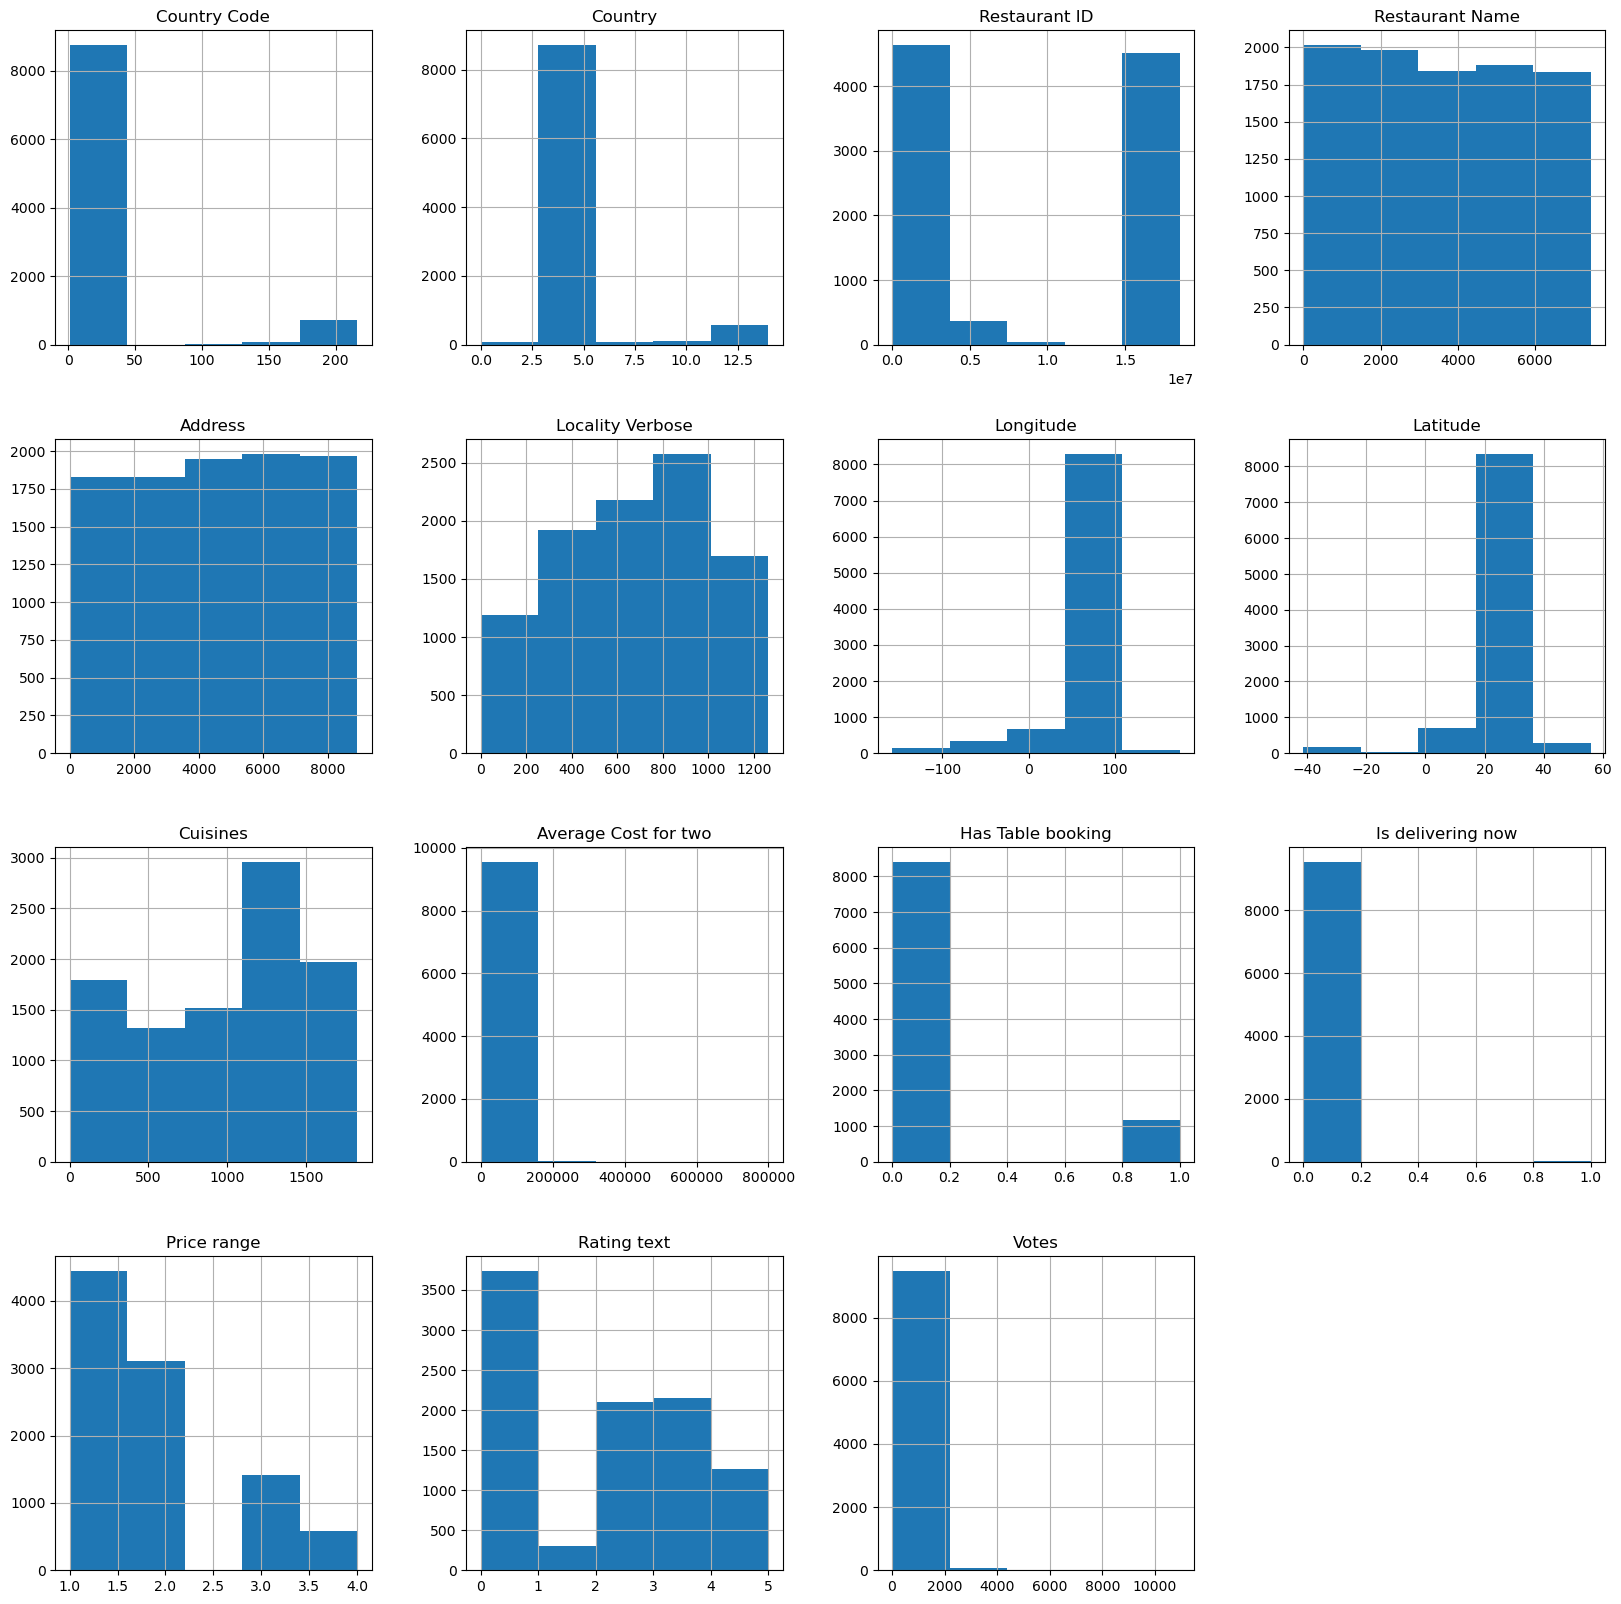

In [45]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

# Reduce skewness

In [46]:
df['Average Cost for two'] = np.cbrt(df['Average Cost for two'])

In [47]:
df['Votes'] = np.cbrt(df['Votes'])

In [48]:
df['Is delivering now'] = np.cbrt(df['Is delivering now'])

In [49]:
df['Has Table booking'] = np.cbrt(df['Has Table booking'])

In [50]:
df['Price range'] = np.cbrt(df['Price range'])

In [51]:
#checking skewness
df.skew()

Country Code             3.043965
Country                  3.312721
Restaurant ID            0.061570
Restaurant Name          0.044772
Address                 -0.040400
Locality Verbose        -0.183517
Longitude               -2.807328
Latitude                -3.081635
Cuisines                -0.305569
Average Cost for two     9.626632
Has Table booking        2.321100
Is delivering now       16.673412
Price range              0.495755
Rating text              0.431408
Votes                    1.204920
dtype: float64

we observe that skewness is reduced

In [52]:
df.groupby('Average Cost for two').mean()

,Country Code,Country,Restaurant ID,Restaurant Name,Address,Locality Verbose,Longitude,Latitude,Cuisines,Has Table booking,Is delivering now,Price range,Rating text,Votes
Average Cost for two,,,,,,,,,,,,,,
0.000000,108.500000,8.500000,1.367716e+07,3633.277778,2840.944444,524.277778,-15.696912,29.431201,1134.166667,0.0,0.0,1.000000,1.888889,4.151600
1.912931,14.000000,0.000000,1.660822e+07,3376.500000,1691.000000,436.750000,147.742600,-35.143051,567.000000,0.0,0.0,1.000000,2.000000,4.209815
2.154435,215.992188,13.992188,1.732532e+07,3739.515625,1596.000000,496.718750,-93.397800,36.588424,672.726562,0.0,0.0,1.000000,3.046875,6.161407
2.466212,215.000000,13.000000,7.050728e+06,2694.500000,1439.250000,672.250000,-2.305343,53.592078,588.000000,0.0,0.0,1.064980,1.750000,2.836958
2.714418,98.520000,5.200000,1.335775e+07,3368.920000,1895.280000,590.280000,91.298442,-1.800700,736.840000,0.0,0.0,1.249524,2.440000,4.019160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66.943295,94.000000,4.000000,1.836965e+07,4280.500000,5229.000000,422.000000,106.742218,-6.230362,755.500000,0.0,0.0,1.442250,3.500000,6.539962
70.472987,94.000000,4.000000,7.422489e+06,507.000000,5282.000000,1105.000000,106.821023,-6.196270,923.000000,0.0,0.0,1.442250,5.000000,6.240251
76.630943,94.000000,4.000000,7.421967e+06,41.000000,5822.000000,1022.000000,106.813400,-6.235241,1111.000000,0.0,0.0,1.442250,5.000000,7.337234


In [53]:
df.groupby('Price range').mean()

,Country Code,Country,Restaurant ID,Restaurant Name,Address,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Is delivering now,Rating text,Votes
Price range,,,,,,,,,,,,,,
1.000000,7.896265,3.343384,1.017772e+07,3523.264401,4719.668992,712.815032,67.032050,26.807458,987.614086,6.304579,0.000225,0.001575,1.646265,2.254608
1.259921,16.816254,3.736267,8.585929e+06,3719.865724,4407.610986,677.610344,63.657955,26.737424,998.273691,8.074669,0.076775,0.006746,1.567620,3.973978
1.442250,39.527699,4.563920,7.706136e+06,3785.443892,4011.645597,569.852983,58.793913,24.195927,992.578125,10.264328,0.457386,0.004261,2.405540,6.292680
1.587401,55.145051,4.735495,6.210411e+06,3968.302048,5190.221843,665.936860,57.394946,17.920442,957.093857,11.065577,0.467577,0.000000,2.561433,5.828086


we observe that average cost for two is highest percent at price range 1.58

# Correlation Matrix and Heatmap

In [54]:
df.corr()

,Country Code,Country,Restaurant ID,Restaurant Name,Address,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Has Table booking,Is delivering now,Price range,Rating text,Votes
Country Code,1.000000,0.968700,0.148471,0.019812,-0.220402,-0.117727,-0.698299,0.019792,-0.129500,-0.260619,-0.061682,-0.018291,0.234402,0.222685,0.308535
Country,0.968700,1.000000,0.161763,0.017396,-0.235866,-0.116551,-0.766221,0.181299,-0.124195,-0.303323,-0.062076,-0.016607,0.175149,0.203846,0.299344
Restaurant ID,0.148471,0.161763,1.000000,0.003990,0.080619,0.070084,-0.226081,-0.052081,-0.077676,-0.137003,-0.110071,0.012548,-0.134899,0.251114,-0.328241
Restaurant Name,0.019812,0.017396,0.003990,1.000000,0.000702,0.004267,-0.001849,0.009841,0.051398,0.040581,0.041201,0.011988,0.061761,0.011963,0.035745
Address,-0.220402,-0.235866,0.080619,0.000702,1.000000,0.160454,0.185819,-0.038679,0.022836,0.102845,0.006441,0.031268,-0.045693,-0.008031,-0.178546
Locality Verbose,-0.117727,-0.116551,0.070084,0.004267,0.160454,1.000000,0.084447,-0.020925,0.005510,-0.015879,-0.065085,-0.007348,-0.115383,-0.035476,-0.200433
Longitude,-0.698299,-0.766221,-0.226081,-0.001849,0.185819,0.084447,1.000000,0.043207,0.122510,0.316831,0.100488,0.018787,-0.078515,-0.181466,-0.147268
Latitude,0.019792,0.181299,-0.052081,0.009841,-0.038679,-0.020925,0.043207,1.000000,0.038635,-0.113216,0.054658,0.015001,-0.149886,-0.129447,0.005973
Cuisines,-0.129500,-0.124195,-0.077676,0.051398,0.022836,0.005510,0.122510,0.038635,1.000000,0.057801,0.050235,0.007708,-0.003084,-0.080022,-0.061454
Average Cost for two,-0.260619,-0.303323,-0.137003,0.040581,0.102845,-0.015879,0.316831,-0.113216,0.057801,1.000000,0.354593,0.016381,0.448604,0.003819,0.240209


In [55]:
correlations = df.corr()['Average Cost for two'].sort_values(ascending=False)
print(correlations)

Average Cost for two    1.000000
Price range             0.448604
Has Table booking       0.354593
Longitude               0.316831
Votes                   0.240209
Address                 0.102845
Cuisines                0.057801
Restaurant Name         0.040581
Is delivering now       0.016381
Rating text             0.003819
Locality Verbose       -0.015879
Latitude               -0.113216
Restaurant ID          -0.137003
Country Code           -0.260619
Country                -0.303323
Name: Average Cost for two, dtype: float64


<Axes: >

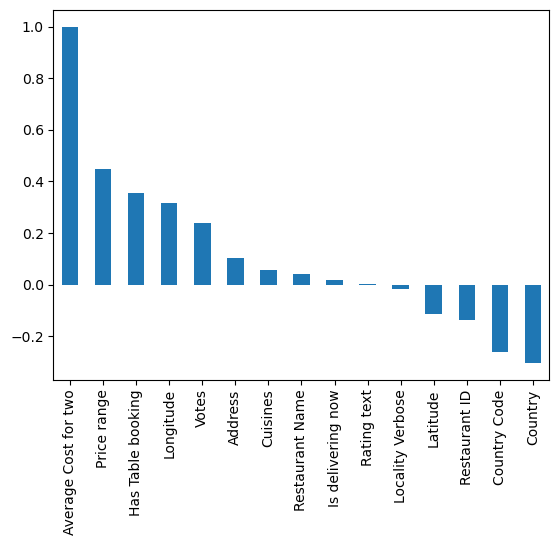

In [56]:
correlations.plot(kind='bar')

From this barplot we can observe price range is approx 0.44 in positive and country with -0.3 value and we also seen that has table bookin, longitude, votes, address, cuisiness and restaurant name are with positive value and other are with negative value

<Axes: >

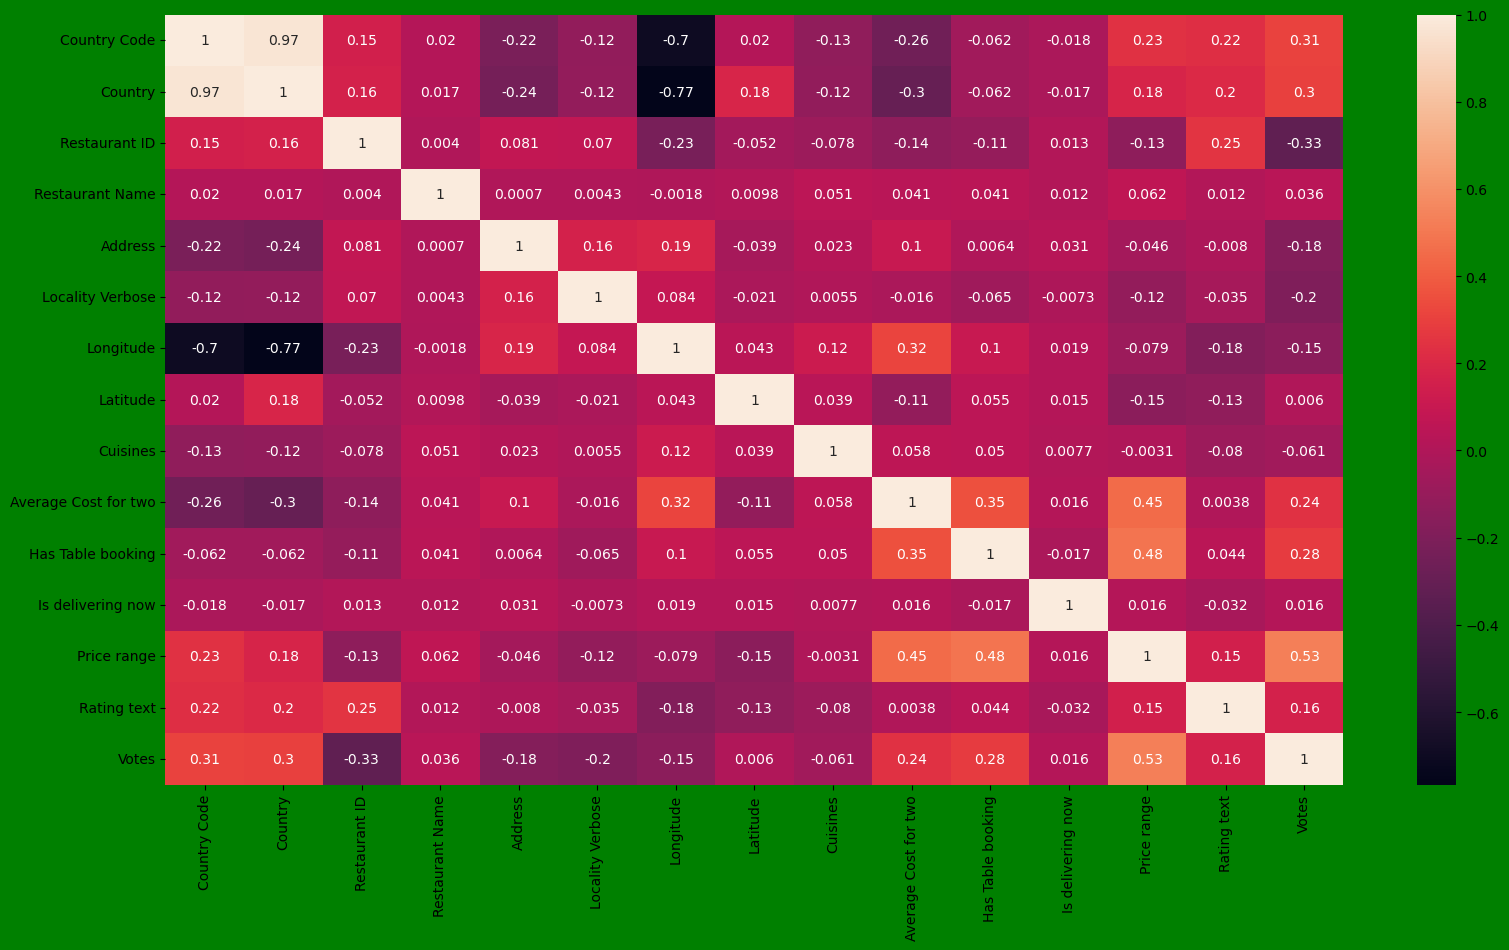

In [57]:
# ploting heatmap
plt.figure(figsize=[19,10],facecolor='green')
sns.heatmap(df.corr(),annot=True)

From this heatmap we can observe, some longitude is more negatively correlated with country and country code so we can drop it

In [58]:
df = df.drop(['Longitude'], axis=1)

In [59]:
print(abs(correlations) > 0.2)

Average Cost for two     True
Price range              True
Has Table booking        True
Longitude                True
Votes                    True
Address                 False
Cuisines                False
Restaurant Name         False
Is delivering now       False
Rating text             False
Locality Verbose        False
Latitude                False
Restaurant ID           False
Country Code             True
Country                  True
Name: Average Cost for two, dtype: bool


From all the values, we are selecting Average Cost for two,Price range,Has Table booking,Longitude  are positively creat effect

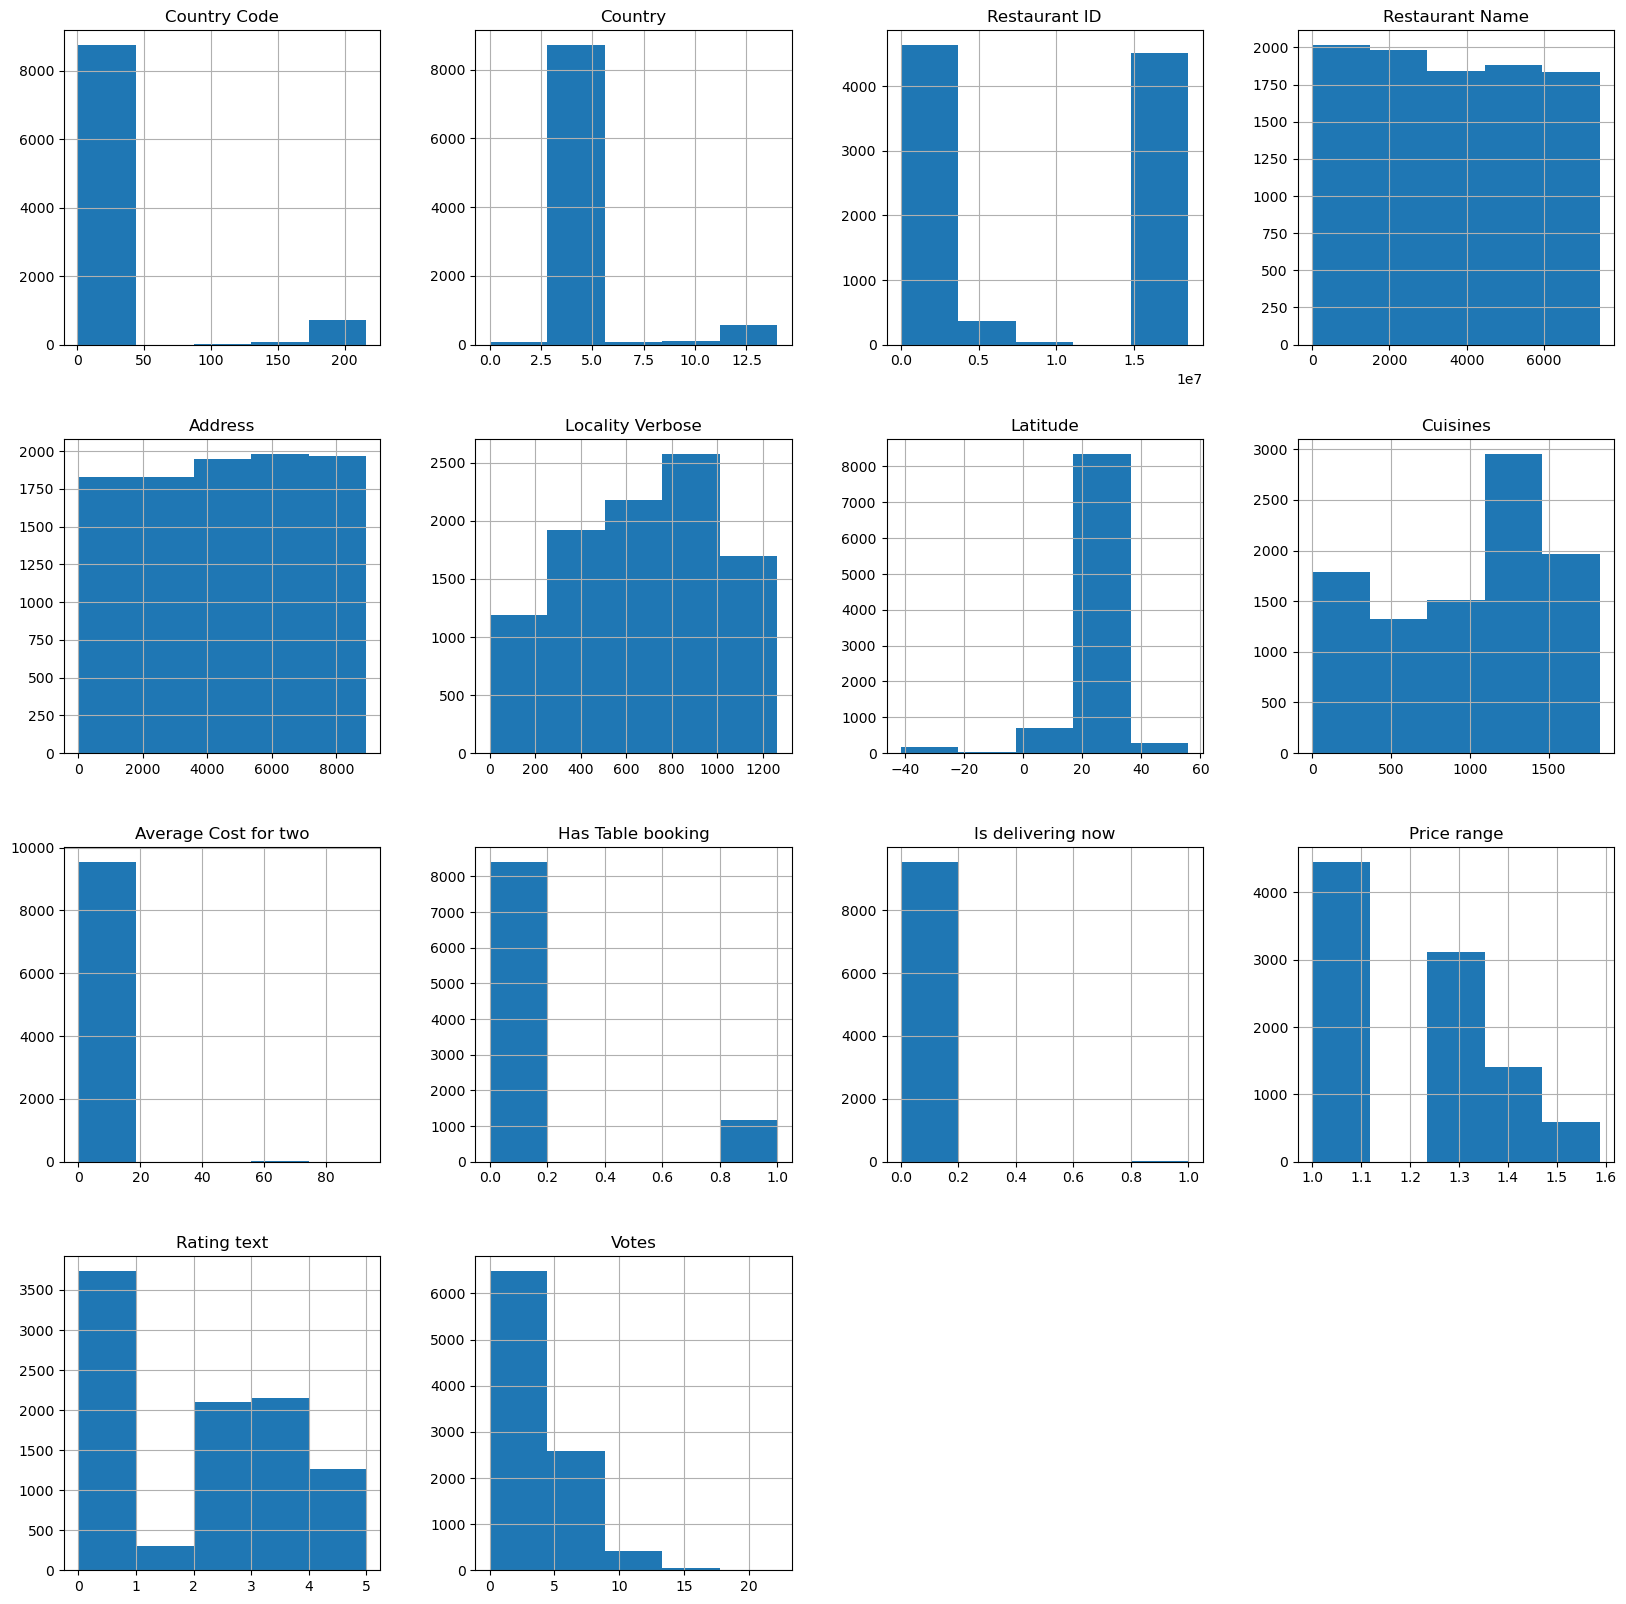

In [60]:
df.hist(bins=5, figsize=(20, 20))
plt.show()

we observe now all features are normaly distributed

# Feature Selection

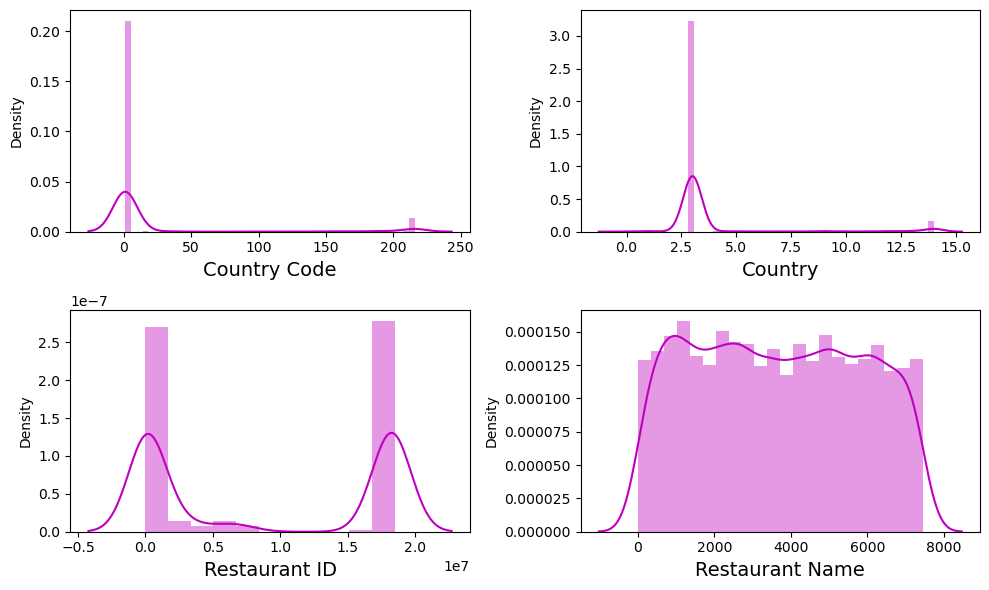

In [61]:
#checking how data is distributed
plt.figure(figsize=(10,6), facecolor ="white")
plotnumber =1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color= "m")
        plt.xlabel(col, fontsize = 14)
        plt.yticks(rotation =0,fontsize = 10 )
    plotnumber+=1
plt.tight_layout()

we obseve that all featutes are normaly distributed

In [62]:
df = df.drop(['Country Code'], axis=1)

In [63]:
df

,Country,Restaurant ID,Restaurant Name,Address,Locality Verbose,Latitude,Cuisines,Average Cost for two,Has Table booking,Is delivering now,Price range,Rating text,Votes
0,3,3400025,3201,4553,17,27.161661,1514,9.472682,0.0,0.0,1.442250,2,5.192494
1,3,3400341,5261,4605,17,0.000000,1514,8.879040,0.0,0.0,1.259921,2,4.140818
2,3,3400005,6919,6234,17,27.160832,1306,7.937005,0.0,0.0,1.259921,2,4.546836
3,3,3400021,1637,100,205,27.195928,1645,7.368063,0.0,0.0,1.259921,5,4.431048
4,3,3400017,4922,1316,205,27.201725,1373,10.000000,0.0,0.0,1.442250,5,5.614672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,14,17697389,6794,1279,1231,42.498400,18,2.154435,0.0,0.0,1.000000,2,4.657010
9547,14,17697424,6839,2667,1231,42.497919,1795,2.154435,0.0,0.0,1.000000,2,3.870877
9548,14,17697332,6945,957,1231,42.465580,1125,2.924018,0.0,0.0,1.259921,2,5.383213
9549,14,17694056,6883,1910,1233,40.396043,317,2.924018,0.0,0.0,1.259921,2,5.383213


# Split data into features and labels for Regression

In [64]:
x_reg = df.drop(['Average Cost for two'], axis=1)
y_reg = df['Average Cost for two']

In [65]:
x_reg.shape

(9551, 12)

In [66]:
y_reg.shape

(9551,)

# checking variance inflation Factor(vif)

In [67]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x_reg.values, i)
                    for i in range (len(x_reg.columns))]
vif["Features"] = x_reg.columns
vif

,VIF values,Features
0,4.200576,Country
1,2.749939,Restaurant ID
2,3.874831,Restaurant Name
3,4.447117,Address
4,5.162076,Locality Verbose
5,6.042879,Latitude
6,4.651648,Cuisines
7,1.360949,Has Table booking
8,1.008921,Is delivering now
9,22.929939,Price range


we observe by checking vif values the feature  causing multicollineraity problem. many have  vif 
is  more than 10 so  need to drop some feature. and there is multicollineraity problem 

In [68]:
y_reg.value_counts()

7.937005     900
6.694330     897
7.368063     857
5.848035     687
8.434327     652
            ... 
41.212853      1
54.848066      1
76.630943      1
49.324241      1
16.261333      1
Name: Average Cost for two, Length: 140, dtype: int64

# oversampling

In [69]:
x_reg.columns = x_reg.columns.astype(str)

In [70]:
x_reg

,Country,Restaurant ID,Restaurant Name,Address,Locality Verbose,Latitude,Cuisines,Has Table booking,Is delivering now,Price range,Rating text,Votes
0,3,3400025,3201,4553,17,27.161661,1514,0.0,0.0,1.442250,2,5.192494
1,3,3400341,5261,4605,17,0.000000,1514,0.0,0.0,1.259921,2,4.140818
2,3,3400005,6919,6234,17,27.160832,1306,0.0,0.0,1.259921,2,4.546836
3,3,3400021,1637,100,205,27.195928,1645,0.0,0.0,1.259921,5,4.431048
4,3,3400017,4922,1316,205,27.201725,1373,0.0,0.0,1.442250,5,5.614672
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,14,17697389,6794,1279,1231,42.498400,18,0.0,0.0,1.000000,2,4.657010
9547,14,17697424,6839,2667,1231,42.497919,1795,0.0,0.0,1.000000,2,3.870877
9548,14,17697332,6945,957,1231,42.465580,1125,0.0,0.0,1.259921,2,5.383213
9549,14,17694056,6883,1910,1233,40.396043,317,0.0,0.0,1.259921,2,5.383213


# Model Creation

Finding the best random state

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# creating train test split

In [72]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_reg_train, y_reg_train)
    pred = lr.predict(x_reg_test)
    acc = r2_score(y_reg_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.6768545783577389 on random_state  7


In [73]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size = 0.30, random_state= maxRS)

# Regression algorithms

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge


In [75]:
LR = LinearRegression()
LR.fit(x_reg_train,y_reg_train)
pred_LR= LR.predict(x_reg_test)
pred_train=LR.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_LR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_LR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_LR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_LR)))

R2_score: 0.6768545783577389
R2_score on training Data: 32.207165196409825
Mean_Absolute_Error: 0.8779093484399516
Mean_Squared_Error: 1.864151715636245
Root Mean Squared Error: 1.3653394140785085


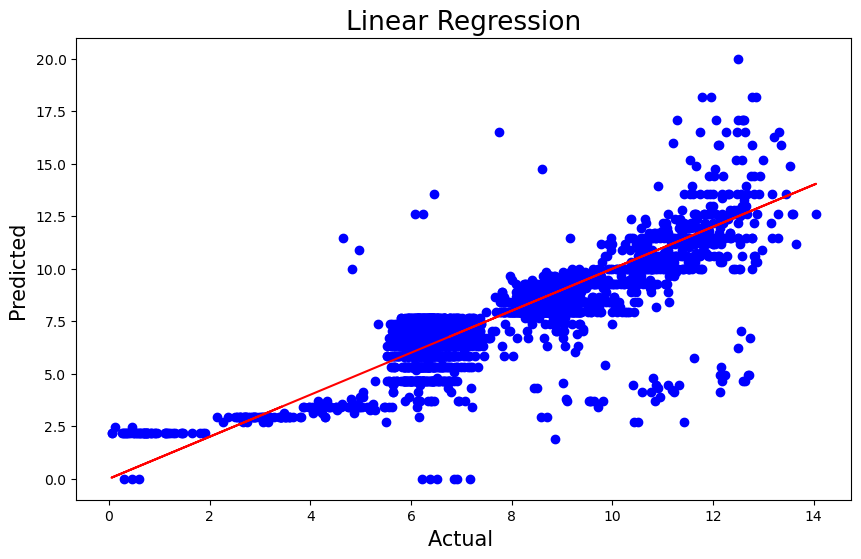

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_reg_test,color='b')
plt.plot(pred_LR,pred_LR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Linear Regression",fontsize=19)
plt.show()

In [77]:
RFR = RandomForestRegressor()
RFR.fit(x_reg_train,y_reg_train)
pred_RFR= RFR.predict(x_reg_test)
pred_train=RFR.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_RFR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_RFR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_RFR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_RFR)))

R2_score: 0.9011506369815276
R2_score on training Data: 98.83909186055885
Mean_Absolute_Error: 0.5132386635225699
Mean_Squared_Error: 0.5702392709881309
Root Mean Squared Error: 0.7551418879840601


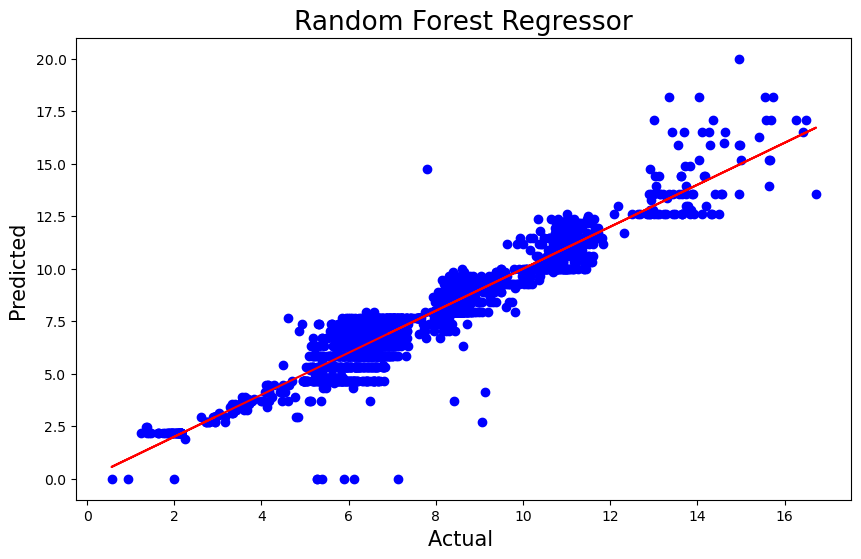

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(x=pred_RFR,y=y_reg_test,color='b')
plt.plot(pred_RFR,pred_RFR,color='r')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted ',fontsize=15)
plt.title("Random Forest Regressor",fontsize=19)
plt.show()

In [79]:
knn = KNN()
knn.fit(x_reg_train,y_reg_train)
pred_knn= knn.predict(x_reg_test)
pred_train=knn.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_knn)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_knn)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_knn))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_knn)))

R2_score: 0.18211624231222856
R2_score on training Data: 67.09218392687384
Mean_Absolute_Error: 1.5351872412334924
Mean_Squared_Error: 4.718183542060378
Root Mean Squared Error: 2.1721380117433555


In [80]:
GBR=GradientBoostingRegressor()
GBR.fit(x_reg_train,y_reg_train)
pred_GBR= GBR.predict(x_reg_test)
pred_train=GBR.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_GBR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_GBR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_GBR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_GBR)))

R2_score: 0.8812049191982728
R2_score on training Data: 95.46356540460236
Mean_Absolute_Error: 0.5814641293509125
Mean_Squared_Error: 0.6853015356375526
Root Mean Squared Error: 0.8278294121602304


In [81]:
lasso=Lasso()
lasso.fit(x_reg_train,y_reg_train)
pred_lasso= lasso.predict(x_reg_test)
pred_train=lasso.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_lasso)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_lasso)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_lasso))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_lasso)))

R2_score: 0.3167093571212257
R2_score on training Data: 17.03266832774578
Mean_Absolute_Error: 1.432805369847984
Mean_Squared_Error: 3.9417467768142354
Root Mean Squared Error: 1.9853832820929653


In [82]:
rd=Ridge()
rd.fit(x_reg_train,y_reg_train)
pred_rd= rd.predict(x_reg_test)
pred_train=rd.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_rd)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_rd)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_rd))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_rd)))

R2_score: 0.6771111631140188
R2_score on training Data: 32.20677276838811
Mean_Absolute_Error: 0.8769771719441185
Mean_Squared_Error: 1.8626715371110645
Root Mean Squared Error: 1.3647972512835247


In [83]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_reg_train,y_reg_train)
pred_DTR= dtr.predict(x_reg_test)
pred_train=dtr.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_DTR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_DTR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_DTR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_DTR)))

R2_score: 0.8298233398879442
R2_score on training Data: 100.0
Mean_Absolute_Error: 0.6499478428671718
Mean_Squared_Error: 0.9817100650750692
Root Mean Squared Error: 0.9908128304957851


In [84]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_reg_train,y_reg_train)
pred_SVR= svr.predict(x_reg_test)
pred_train=svr.predict(x_reg_train)
print('R2_score:',r2_score(y_reg_test,pred_SVR)) 
print('R2_score on training Data:',r2_score(y_reg_train,pred_train)*100) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred_SVR)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred_SVR))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred_SVR)))

R2_score: 0.17266480371523008
R2_score on training Data: 0.04592681307811208
Mean_Absolute_Error: 1.5815067106231895
Mean_Squared_Error: 4.772706720468056
Root Mean Squared Error: 2.1846525399861774


# Cross Validation Score

In [85]:
from sklearn.model_selection import cross_val_score

In [86]:
score = cross_val_score(LR,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_LR) - score.mean())*100)

[ 0.74697959  0.79355458  0.78064496  0.79437316 -0.08033335]
0.6070437858275083
Difference between R2 score and cross validation score is : 6.98107925302306


In [87]:
score = cross_val_score(RFR,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_RFR) - score.mean())*100)

[ 0.82847135  0.88263471  0.86310336  0.89595813 -0.03749776]
0.6865339582788605
Difference between R2 score and cross validation score is : 21.46166787026671


In [88]:
score = cross_val_score(knn,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_knn) - score.mean())*100)

[-0.41862682 -0.11854779 -0.40364387 -0.11802246 -0.15585019]
-0.2429382269745945
Difference between R2 score and cross validation score is : 42.505446928682304


In [89]:
score = cross_val_score(GBR,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_GBR) - score.mean())*100)

[ 0.83625865  0.86379816  0.84050889  0.87887983 -0.07058568]
0.6697719684699734
Difference between R2 score and cross validation score is : 21.143295072829936


In [90]:
score = cross_val_score(lasso,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_lasso) - score.mean())*100)

[ 0.21741059  0.21942964  0.0988937   0.20864972 -0.04445583]
0.13998556225282574
Difference between R2 score and cross validation score is : 17.672379486839997


In [91]:
score = cross_val_score(rd,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_rd) - score.mean())*100)

[ 0.74639166  0.79293111  0.78046485  0.7937376  -0.07960294]
0.6067844570568444
Difference between R2 score and cross validation score is : 7.032670605717439


In [92]:
score = cross_val_score(dtr,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_DTR) - score.mean())*100)

[ 0.643113    0.80181938  0.74512474  0.81502424 -0.07531107]
0.5859540589170711
Difference between R2 score and cross validation score is : 24.386928097087313


In [93]:
score = cross_val_score(svr,x_reg,y_reg)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is :",(r2_score(y_reg_test,pred_SVR) - score.mean())*100)

[-0.28226094 -0.05536926 -0.07873239 -0.05086667 -0.04754408]
-0.10295466897506941
Difference between R2 score and cross validation score is : 27.56194726902995


LinearRegression(LR) is our best model as the difference between R2 score and cross validation
score is : 6.98107925302306 and this is least out of all

finaly we observe that LinearRegression(LR) is our best model

# Hyper Parameter Tuning

In [94]:
# LinearRegression(LR)
from sklearn.model_selection import GridSearchCV



In [95]:
parameters={'fit_intercept':[True],
            'copy_X':[True],
            'n_jobs':[1,2],
            'positive':[False],                   
            }

In [96]:
GCV=GridSearchCV(LinearRegression(),parameters, cv =5)

In [97]:
GCV.fit(x_reg,y_reg)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [1, 2], 'positive': [False]})

In [98]:
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

In [99]:
Final_model1= LinearRegression(copy_X = True,fit_intercept= True,n_jobs =1,positive=False)
Final_model1.fit(x_reg_train,y_reg_train)
pred = Final_model1.predict(x_reg_test)
print('R2_score:',r2_score(y_reg_test,pred)) 
print('Mean_Absolute_Error:',mean_absolute_error(y_reg_test, pred)) 
print('Mean_Squared_Error:',mean_squared_error(y_reg_test, pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_reg_test, pred)))

R2_score: 0.6768545783577389
Mean_Absolute_Error: 0.8779093484399516
Mean_Squared_Error: 1.864151715636245
Root Mean Squared Error: 1.3653394140785085


# Saving the model

In [100]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model1,"Third_Phase_Evaluation_Projects4_Zomato_Restaurant_Prediction_for_Average_cost_for_Two_Prediction_Project_Analysis.pkl")

['Third_Phase_Evaluation_Projects4_Zomato_Restaurant_Prediction_for_Average_cost_for_Two_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [101]:
# first we load the saved model and get prediction
model1= joblib.load("Third_Phase_Evaluation_Projects4_Zomato_Restaurant_Prediction_for_Average_cost_for_Two_Prediction_Project_Analysis.pkl")

#prediction
prediction1 = model1.predict(x_reg_test)
prediction1

array([6.78053761, 8.99302258, 5.99890845, ..., 3.41735229, 8.92830094,
       3.42297757])

# these are the prediction for the Average_cost_for_Two

In [102]:
a1=np.array(y_reg_test)
df2 = pd.DataFrame()
df2["Predicted1"]  = prediction1
df2["Original1"] = a1
df2

,Predicted1,Original1
0,6.780538,7.663094
1,8.993023,9.654894
2,5.998908,7.368063
3,5.753172,6.694330
4,8.445935,8.879040
...,...,...
2861,6.614403,6.694330
2862,6.134970,7.663094
2863,3.417352,2.924018
2864,8.928301,8.662391


# Solve same problem for Price range prediction 

# Split data into features and labels for classification(Price range)

In [103]:
df

,Country,Restaurant ID,Restaurant Name,Address,Locality Verbose,Latitude,Cuisines,Average Cost for two,Has Table booking,Is delivering now,Price range,Rating text,Votes
0,3,3400025,3201,4553,17,27.161661,1514,9.472682,0.0,0.0,1.442250,2,5.192494
1,3,3400341,5261,4605,17,0.000000,1514,8.879040,0.0,0.0,1.259921,2,4.140818
2,3,3400005,6919,6234,17,27.160832,1306,7.937005,0.0,0.0,1.259921,2,4.546836
3,3,3400021,1637,100,205,27.195928,1645,7.368063,0.0,0.0,1.259921,5,4.431048
4,3,3400017,4922,1316,205,27.201725,1373,10.000000,0.0,0.0,1.442250,5,5.614672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,14,17697389,6794,1279,1231,42.498400,18,2.154435,0.0,0.0,1.000000,2,4.657010
9547,14,17697424,6839,2667,1231,42.497919,1795,2.154435,0.0,0.0,1.000000,2,3.870877
9548,14,17697332,6945,957,1231,42.465580,1125,2.924018,0.0,0.0,1.259921,2,5.383213
9549,14,17694056,6883,1910,1233,40.396043,317,2.924018,0.0,0.0,1.259921,2,5.383213


In [104]:

# Define bin edges (boundaries) and labels for the categories
bin_edges = [0, 1.2, 1.5, 1.7, float('inf')]  # Adjust boundaries as needed
bin_labels = [1,2,3,4]

# Create a new column with the discrete categories
df['Price_Range_Category'] = pd.cut(df['Price range'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame with the discrete categories
print(df)

      Country  Restaurant ID  Restaurant Name  Address  Locality Verbose  \
0           3        3400025             3201     4553                17   
1           3        3400341             5261     4605                17   
2           3        3400005             6919     6234                17   
3           3        3400021             1637      100               205   
4           3        3400017             4922     1316               205   
...       ...            ...              ...      ...               ...   
9546       14       17697389             6794     1279              1231   
9547       14       17697424             6839     2667              1231   
9548       14       17697332             6945      957              1231   
9549       14       17694056             6883     1910              1233   
9550       14       17559793             2342      962              1243   

       Latitude  Cuisines  Average Cost for two  Has Table booking  \
0     27.161661  

In [105]:
x_classification = df.drop(['Price_Range_Category'], axis=1)
y_classification = df['Price_Range_Category']

# Feature Scaling using Standard Scalarization

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_classification=pd.DataFrame(scaler.fit_transform(x_classification),columns = x_classification.columns)
x_classification

,Country,Restaurant ID,Restaurant Name,Address,Locality Verbose,Latitude,Cuisines,Average Cost for two,Has Table booking,Is delivering now,Price range,Rating text,Votes
0,-0.277839,-0.642824,-0.211091,0.004111,-1.991187,0.118764,1.018198,0.481021,-0.371446,-0.059771,1.324498,0.124686,0.564373
1,-0.277839,-0.642788,0.750325,0.024379,-1.991187,-2.348827,1.018198,0.314548,-0.371446,-0.059771,0.382254,0.124686,0.184617
2,-0.277839,-0.642826,1.524126,0.659319,-1.991187,0.118689,0.614068,0.050376,-0.371446,-0.059771,0.382254,0.124686,0.331228
3,-0.277839,-0.642824,-0.941021,-1.731548,-1.424335,0.121877,1.272722,-0.109171,-0.371446,-0.059771,0.382254,1.895070,0.289418
4,-0.277839,-0.642825,0.592112,-1.257584,-1.424335,0.122404,0.744245,0.628895,-0.371446,-0.059771,1.324498,1.895070,0.716820
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,3.870249,0.983529,1.465787,-1.272006,1.669232,1.512081,-1.888428,-1.571212,-0.371446,-0.059771,-0.960976,0.124686,0.371012
9547,3.870249,0.983533,1.486789,-0.731001,1.669232,1.512037,1.564162,-1.571212,-0.371446,-0.059771,-0.960976,0.124686,0.087142
9548,3.870249,0.983522,1.536260,-1.397512,1.669232,1.509099,0.262397,-1.355400,-0.371446,-0.059771,0.382254,0.124686,0.633240
9549,3.870249,0.983150,1.507324,-1.026059,1.675263,1.321086,-1.307491,-1.355400,-0.371446,-0.059771,0.382254,0.124686,0.633240


# checking variance inflation Factor(vif)

In [107]:
#find vif in each scaled column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x_classification.values, i)
                    for i in range (len(x_classification.columns))]
vif["Features"] = x_classification.columns
vif

,VIF values,Features
0,1.675887,Country
1,1.364020,Restaurant ID
2,1.007908,Restaurant Name
3,1.106848,Address
4,1.062443,Locality Verbose
5,1.153332,Latitude
6,1.032983,Cuisines
7,1.597085,Average Cost for two
8,1.424010,Has Table booking
9,1.006314,Is delivering now


we observe by checking vif values the feature causing multicollineraity problem.There is no any column have vif value is 
more than 10 so there is no multicollineraity problem

In [108]:
y_classification.value_counts()

2    4521
1    4444
3     586
4       0
Name: Price_Range_Category, dtype: int64

# oversampling

In [109]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x_classification,y_classification)

In [110]:
y1.value_counts()

1    4521
2    4521
3    4521
4       0
Name: Price_Range_Category, dtype: int64

we observe that all features are balanced

# Model Creation

Finding the best random state

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [112]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_classification_train, x_classification_test, y_classification_train, y_classification_test = train_test_split(x_classification, y_classification, test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_classification_train, y_classification_train)
    pred = lr.predict(x_classification_test)
    acc = r2_score(y_classification_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS  = i
print("Maximum r2 score is =",  maxAccu, "on random_state ", maxRS)

Maximum r2 score is = 0.9246560414590922 on random_state  45


# Creating train test split

In [113]:
x_classification_train, x_classification_test, y_classification_train, y_classification_test = train_test_split(x_classification, y_classification, test_size = 0.30, random_state = maxRS)

# classification algorithms

In [114]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [115]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_classification_train, y_classification_train)
predRFC= RFC.predict(x_classification_test)
print(accuracy_score(y_classification_test, predRFC)) 
print(confusion_matrix(y_classification_test, predRFC)) 
print(classification_report(y_classification_test, predRFC))

1.0
[[1379    0    0]
 [   0 1300    0]
 [   0    0  187]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1379
           2       1.00      1.00      1.00      1300
           3       1.00      1.00      1.00       187

    accuracy                           1.00      2866
   macro avg       1.00      1.00      1.00      2866
weighted avg       1.00      1.00      1.00      2866



we observe that Random Forest Clssifier accuracy 100.0%

# support vector classifier

In [117]:
# checking accuracy for support vector classifier
svc = SVC()
svc.fit(x_classification_train, y_classification_train)
predsvc= svc.predict(x_classification_test)
print(accuracy_score(y_classification_test, predsvc)) 
print(confusion_matrix(y_classification_test, predsvc)) 
print(classification_report(y_classification_test, predsvc))

0.9961618981158409
[[1373    6    0]
 [   0 1299    1]
 [   0    4  183]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1379
           2       0.99      1.00      1.00      1300
           3       0.99      0.98      0.99       187

    accuracy                           1.00      2866
   macro avg       1.00      0.99      0.99      2866
weighted avg       1.00      1.00      1.00      2866



we observe that support vector classifier accuracy 99.61%

# ExtraTreeClassifier

In [119]:
# checking accuracy for ExtraTreeClassifier
ET = ExtraTreeClassifier()
ET.fit(x_classification_train, y_classification_train)
predET= ET.predict(x_classification_test)
print(accuracy_score(y_classification_test, predET)) 
print(confusion_matrix(y_classification_test, predET)) 
print(classification_report(y_classification_test, predET))

0.9822051639916259
[[1375    4    0]
 [   3 1280   17]
 [   0   27  160]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1379
           2       0.98      0.98      0.98      1300
           3       0.90      0.86      0.88       187

    accuracy                           0.98      2866
   macro avg       0.96      0.95      0.95      2866
weighted avg       0.98      0.98      0.98      2866



we observe that support vector classifier accuracy 98.22%

# LogisticRegression

In [121]:
# checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_classification_train, y_classification_train)
predLR= LR.predict(x_classification_test)
print(accuracy_score(y_classification_test, predLR)) 
print(confusion_matrix(y_classification_test, predLR)) 
print(classification_report(y_classification_test, predLR))

1.0
[[1379    0    0]
 [   0 1300    0]
 [   0    0  187]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1379
           2       1.00      1.00      1.00      1300
           3       1.00      1.00      1.00       187

    accuracy                           1.00      2866
   macro avg       1.00      1.00      1.00      2866
weighted avg       1.00      1.00      1.00      2866



we observe that support vector classifier accuracy 100%

# Cross Validation Score

In [122]:
from sklearn.model_selection import cross_val_score

cv=5--- it's a fold value 1,2,3,4,5

cross_val_score(modelname, features, targetvariable, cv=foldvalue, scoring='accuracy')

in classification algorithms- default scoring parameter- accuracy

for regression- deafult scoring parameter is - r2 score

In [123]:
# checking cv score for Random Forest Classifier
score = cross_val_score(RFC,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predRFC) - score.mean())

[1.         1.         1.         0.99895288 0.83926702]
0.9676439790575916
Difference between Accuracy score and cross validation score is - 0.032356020942408414


In [124]:
# checking cv score for support vector classifier
score = cross_val_score(svc,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predsvc) - score.mean())

[0.99895343 0.99947644 1.         0.97486911 0.80157068]
0.9549739315782695
Difference between Accuracy score and cross validation score is - 0.0411879665375714


In [125]:
# checking cv score for ExtraTreeClassifier
score = cross_val_score(ET,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predET) - score.mean())

[0.95709053 0.97277487 1.         0.94973822 0.67486911]
0.9108945454943959
Difference between Accuracy score and cross validation score is - 0.07131061849723008


In [126]:
# checking cv score for LogisticRegression
score = cross_val_score(LR,x_classification,y_classification)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -" ,accuracy_score(y_classification_test, predLR) - score.mean())

[1.         1.         1.         1.         0.95759162]
0.9915183246073298
Difference between Accuracy score and cross validation score is - 0.008481675392670196


Logistic Regression Classifier is our best model as the difference between accuracy score and cross validation score
is =0.008481675392670196 and this is least out of all

finaly we observe that Logistic Regression Classifier is our best model

# Hyper Parameter Tuning

In [128]:
# Logistic Regression Classifier
from sklearn.model_selection import GridSearchCV

parameters={'penalty':['l1','l2'],
            'dual':[False],
            'C':[1.0],
            'fit_intercept':[True],
            'intercept_scaling':[1]}

In [129]:
GCV=GridSearchCV(LogisticRegression(),parameters, cv =5)

In [130]:
GCV.fit(x_classification_train,y_classification_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0], 'dual': [False], 'fit_intercept': [True],
                         'intercept_scaling': [1], 'penalty': ['l1', 'l2']})

In [131]:
GCV.best_params_

{'C': 1.0,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'penalty': 'l2'}

In [132]:
Final_model = LogisticRegression(C = 1.0, dual = False, fit_intercept = True, intercept_scaling = 1, penalty = 'l2')
Final_model.fit(x_classification_train,y_classification_train)
pred = Final_model.predict(x_classification_test)
acc = accuracy_score(y_classification_test, pred)
print(acc*100)

100.0


# Saving the model

In [133]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"Third_Phase_Evaluation_Projects4_Zomato_Restaurant_Prediction_Price_Range_Prediction_Project_Analysis.pkl")

['Third_Phase_Evaluation_Projects4_Zomato_Restaurant_Prediction_Price_Range_Prediction_Project_Analysis.pkl']

# predicting the saved model

In [134]:
# first we load the saved model and get prediction
model = joblib.load("Third_Phase_Evaluation_Projects4_Zomato_Restaurant_Prediction_Price_Range_Prediction_Project_Analysis.pkl")

#prediction
prediction = model.predict(x_classification_test)
prediction

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

# these are the prediction for Primary_Fuel

In [135]:
a = np.array(y_classification_test)
df1= pd.DataFrame()
df1["Predicted"] = prediction
df1["Original"] = a
df1

,Predicted,Original
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
2861,1,1
2862,1,1
2863,1,1
2864,1,1


our findings

for regression model

LinearRegression(LR) is our best model as the difference between R2 score and cross validation score is : 6.98107925302306 and this is least out of all

finaly we observe that LinearRegression(LR) is our best model

for classification problem

Logistic Regression Classifier is our best model as the difference between accuracy score and cross validation score is =0.008481675392670196 and this is least out of all

finaly we observe that Logistic Regression Classifier is our best model

1.we observe that there 9551row and 22 columns is present in this dataset
2.we observe by heat map that there is no null value present in any columns but 9 missing values are there
3.we observe that average cost for two is highest percent at price range 1.58 
4.From all the values, we are selecting Average Cost for two,Price range,Has Table booking,Longitude are positively creat effect
5.we obseve that at low longitute average price for two is high
6.The mean value and median(50%) in Country Code,Restaurant ID,Average Cost for two,Price range	Aggregate rating and	Votes all columns are apoximately high  it means that data set is skewed in  right direction and it is not normally distributed  columns which means the data is  skewed  in these columns 

7.There is Longitude,Latitude and Aggregate rating  columns in which mean value is less than median(50%) hence there  left skewed 

8.There is  major difference beteen 75% and max in Average Cost for two it means there is outliers are present in these columns

9.In this discription min,std and 25% detail also found
10.there are 4 unique value are present in Price range